<a href="https://colab.research.google.com/github/VivekThakurDev/Python-ML-/blob/main/clussstring_using_k_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv('/content/income.csv')
df.head(10)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [ ]:
df.describe()

In [ ]:
## feature scallling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['Income($)'] = scaler.fit_transform(df[['Income($)']])
df

,Name,Age,Income($)
0,Rob,-1.356055,-0.480684
1,Michael,-1.009157,-0.010159
2,Mohan,-1.009157,-0.692421
3,Ismail,-1.182606,-0.715947
4,Kory,1.245679,1.401417
5,Gautam,0.725332,1.519048
6,David,1.072230,1.636679
7,Andrea,0.551883,1.683732
8,Brad,0.204985,1.542574
9,Angelina,0.031536,0.930891


Text(0.5, 1.0, 'Customer Data')

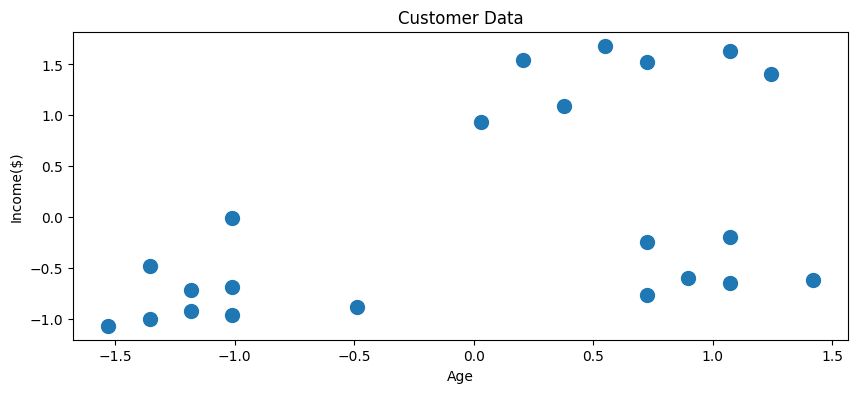

In [ ]:
plt.figure(figsize=(10,4))
plt.scatter(df['Age'],df['Income($)'],s=100)
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Customer Data')

In [ ]:
x = df[['Age','Income($)']]
x


,Age,Income($)
0,-1.356055,-0.480684
1,-1.009157,-0.010159
2,-1.009157,-0.692421
3,-1.182606,-0.715947
4,1.245679,1.401417
5,0.725332,1.519048
6,1.072230,1.636679
7,0.551883,1.683732
8,0.204985,1.542574
9,0.031536,0.930891


In [ ]:
km = KMeans(n_clusters=4)
ypred = km.fit_predict(x)
ypred

array([1, 1, 1, 1, 3, 3, 3, 3, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
x['cluster'] = ypred
x

,Age,Income($),cluster
0,-1.356055,-0.480684,1
1,-1.009157,-0.010159,1
2,-1.009157,-0.692421,1
3,-1.182606,-0.715947,1
4,1.245679,1.401417,3
5,0.725332,1.519048,3
6,1.072230,1.636679,3
7,0.551883,1.683732,3
8,0.204985,1.542574,0
9,0.031536,0.930891,0


In [ ]:
centroid = km.cluster_centers_
centroid

array([[ 0.20498511,  1.18968019],
       [-1.1247901 , -0.74862223],
       [ 0.98550535, -0.51205261],
       [ 0.89878087,  1.56021879]])

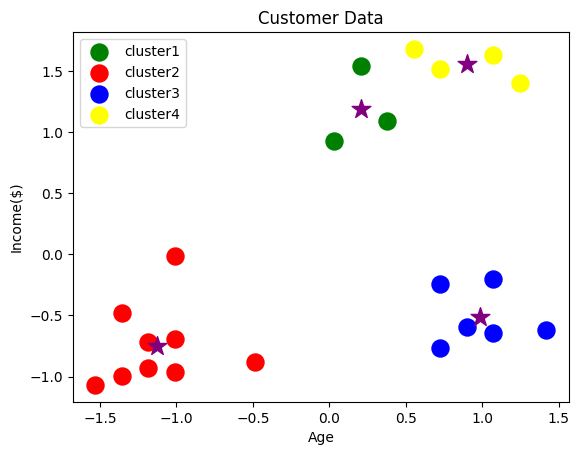

In [ ]:
df1 = x[x['cluster']==0]
df2 = x[x['cluster']==1]
df3 = x[x['cluster']==2]
df4 = x[x['cluster']==3]
plt.scatter(df1['Age'],df1['Income($)'],color='green',label="cluster1",s=150)
plt.scatter(df2['Age'],df2['Income($)'],color='red',label="cluster2",s=150)
plt.scatter(df3['Age'],df3['Income($)'],color='blue',label="cluster3",s=150)
plt.scatter(df4['Age'],df4['Income($)'],color='yellow',label="cluster4",s=150)
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Customer Data')
plt.legend()
plt.scatter(centroid[:,0],centroid[:,1],s=200,marker="*",label="centroid",color='purple')
plt.show()